In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.enable_eager_execution()
from tensorflow import keras 
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/weather1_education_train.csv')
train.head()

,Unnamed: 0,area,building_name,electricity,primary_space_usage,timestamp,TemperatureC,month,year,date,...,hour_23,wkday_0,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,PSU_PrimClass,PSU_UnivClass
0,0,2777.0,PrimClass_Jacqueline,5.0,PrimClass,2014-12-01 00:00:00,7.0,12,2014,1,...,0,1,0,0,0,0,0,0,1,0
1,1,2777.0,PrimClass_Jacqueline,5.2,PrimClass,2014-12-01 01:00:00,5.0,12,2014,1,...,0,1,0,0,0,0,0,0,1,0
2,2,2777.0,PrimClass_Jacqueline,5.2,PrimClass,2014-12-01 02:00:00,5.0,12,2014,1,...,0,1,0,0,0,0,0,0,1,0
3,3,2777.0,PrimClass_Jacqueline,5.5,PrimClass,2014-12-01 03:00:00,6.0,12,2014,1,...,0,1,0,0,0,0,0,0,1,0
4,4,2777.0,PrimClass_Jacqueline,6.0,PrimClass,2014-12-01 04:00:00,7.0,12,2014,1,...,0,1,0,0,0,0,0,0,1,0


In [3]:
test = pd.read_csv('../data/weather1_education_test.csv')

In [4]:
#three_month = 2159 #from 12/01 0:00 to 1/31 23:00
#predict_len = 6598 #length of prediction, 8757 is the length of 1 year-long observation

In [5]:
three_month = 6574 #from 12/01 0:00 to 8/31 23:00
predict_len = 8757 - three_month #length of prediction, 8757 is the length of 1 year-long observation

In [6]:
inputs = layers.Input(shape=(1, three_month)) #temporal data: electricity
x = layers.LSTM(units=128, input_shape=(three_month, 1), activation='relu')(inputs)
x = layers.Dense(predict_len, activation='relu')(x)
model = keras.models.Model(inputs=inputs, outputs=x)

In [7]:
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae', 'mse']) 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 6574)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               3431936   
_________________________________________________________________
dense (Dense)                (None, 2183)              281607    
Total params: 3,713,543
Trainable params: 3,713,543
Non-trainable params: 0
_________________________________________________________________


In [8]:
from dateutil import parser
train['timestamp'] = train['timestamp'].apply(parser.parse)

In [9]:
from datetime import datetime
#end = datetime(2015, 2, 28, 23)
end = datetime(2015, 8, 31, 23)
X_train = train[train['timestamp'] <= end]
Y_train = train[train['timestamp'] > end]

In [10]:
X_train = np.array(X_train['electricity'])
X_train = np.reshape(X_train, (50, 1, three_month))

In [11]:
Y_train = np.array(Y_train['electricity'])
Y_train = np.reshape(Y_train, (50, predict_len))

In [21]:
model.fit(X_train, Y_train, epochs=1000, batch_size=10)

Epoch 1/1000
50/50 [==============================] - 0s 7ms/sample - loss: 192.4901 - mean_absolute_error: 5.7824 - mean_squared_error: 192.4901
Epoch 2/1000
50/50 [==============================] - 0s 6ms/sample - loss: 186.2900 - mean_absolute_error: 5.8527 - mean_squared_error: 186.2900
Epoch 3/1000
50/50 [==============================] - 0s 7ms/sample - loss: 170.0463 - mean_absolute_error: 5.0344 - mean_squared_error: 170.0462
Epoch 4/1000
50/50 [==============================] - 0s 7ms/sample - loss: 171.0398 - mean_absolute_error: 5.0560 - mean_squared_error: 171.0398
Epoch 5/1000
50/50 [==============================] - 0s 7ms/sample - loss: 190.2065 - mean_absolute_error: 5.9882 - mean_squared_error: 190.2065
Epoch 6/1000
50/50 [==============================] - 0s 7ms/sample - loss: 173.8557 - mean_absolute_error: 5.2200 - mean_squared_error: 173.8557
Epoch 7/1000
50/50 [==============================] - 0s 6ms/sample - loss: 171.3419 - mean_absolute_error: 5.0755 - mean_sq

50/50 [==============================] - 0s 7ms/sample - loss: 171.1038 - mean_absolute_error: 5.0633 - mean_squared_error: 171.1038
Epoch 57/1000
50/50 [==============================] - 0s 8ms/sample - loss: 176.0948 - mean_absolute_error: 5.4637 - mean_squared_error: 176.0948
Epoch 58/1000
50/50 [==============================] - 0s 7ms/sample - loss: 180.9334 - mean_absolute_error: 5.6097 - mean_squared_error: 180.9334
Epoch 59/1000
50/50 [==============================] - 0s 8ms/sample - loss: 171.2346 - mean_absolute_error: 5.0818 - mean_squared_error: 171.2346
Epoch 60/1000
50/50 [==============================] - 0s 8ms/sample - loss: 185.5815 - mean_absolute_error: 5.7582 - mean_squared_error: 185.5815
Epoch 61/1000
50/50 [==============================] - 0s 7ms/sample - loss: 171.6504 - mean_absolute_error: 5.1359 - mean_squared_error: 171.6504
Epoch 62/1000
50/50 [==============================] - 0s 7ms/sample - loss: 188.8428 - mean_absolute_error: 5.8834 - mean_squared_e

50/50 [==============================] - 0s 8ms/sample - loss: 181.6984 - mean_absolute_error: 5.5267 - mean_squared_error: 181.6984
Epoch 112/1000
50/50 [==============================] - 0s 8ms/sample - loss: 171.3020 - mean_absolute_error: 5.1962 - mean_squared_error: 171.3020
Epoch 113/1000
50/50 [==============================] - 0s 8ms/sample - loss: 172.8176 - mean_absolute_error: 5.1048 - mean_squared_error: 172.8176
Epoch 114/1000
50/50 [==============================] - 0s 9ms/sample - loss: 188.8115 - mean_absolute_error: 5.8303 - mean_squared_error: 188.8114
Epoch 115/1000
50/50 [==============================] - 0s 8ms/sample - loss: 173.7359 - mean_absolute_error: 5.2532 - mean_squared_error: 173.7359
Epoch 116/1000
50/50 [==============================] - 0s 8ms/sample - loss: 178.2246 - mean_absolute_error: 5.3650 - mean_squared_error: 178.2246
Epoch 117/1000
50/50 [==============================] - 0s 7ms/sample - loss: 189.0559 - mean_absolute_error: 6.0419 - mean_squ

50/50 [==============================] - 0s 8ms/sample - loss: 174.4465 - mean_absolute_error: 5.2223 - mean_squared_error: 174.4465
Epoch 167/1000
50/50 [==============================] - 0s 7ms/sample - loss: 173.1381 - mean_absolute_error: 5.2162 - mean_squared_error: 173.1381
Epoch 168/1000
50/50 [==============================] - 0s 7ms/sample - loss: 174.8422 - mean_absolute_error: 5.2569 - mean_squared_error: 174.8422
Epoch 169/1000
50/50 [==============================] - 0s 7ms/sample - loss: 212.9419 - mean_absolute_error: 6.4883 - mean_squared_error: 212.9419
Epoch 170/1000
50/50 [==============================] - 0s 7ms/sample - loss: 172.4685 - mean_absolute_error: 5.2280 - mean_squared_error: 172.4685
Epoch 171/1000
50/50 [==============================] - 0s 7ms/sample - loss: 170.0054 - mean_absolute_error: 4.9928 - mean_squared_error: 170.0054
Epoch 172/1000
50/50 [==============================] - 0s 7ms/sample - loss: 171.3939 - mean_absolute_error: 5.1336 - mean_squ

50/50 [==============================] - 0s 8ms/sample - loss: 199.2395 - mean_absolute_error: 6.3253 - mean_squared_error: 199.2395
Epoch 222/1000
50/50 [==============================] - 0s 7ms/sample - loss: 170.8774 - mean_absolute_error: 5.0961 - mean_squared_error: 170.8774
Epoch 223/1000
50/50 [==============================] - 0s 7ms/sample - loss: 170.2006 - mean_absolute_error: 5.0357 - mean_squared_error: 170.2005
Epoch 224/1000
50/50 [==============================] - 0s 7ms/sample - loss: 181.5137 - mean_absolute_error: 5.5215 - mean_squared_error: 181.5137
Epoch 225/1000
50/50 [==============================] - 0s 7ms/sample - loss: 176.4350 - mean_absolute_error: 5.3058 - mean_squared_error: 176.4350
Epoch 226/1000
50/50 [==============================] - 0s 7ms/sample - loss: 169.9339 - mean_absolute_error: 5.0070 - mean_squared_error: 169.9339
Epoch 227/1000
50/50 [==============================] - 0s 7ms/sample - loss: 174.4423 - mean_absolute_error: 5.3845 - mean_squ

50/50 [==============================] - 0s 7ms/sample - loss: 204.3457 - mean_absolute_error: 6.4239 - mean_squared_error: 204.3457
Epoch 277/1000
50/50 [==============================] - 0s 7ms/sample - loss: 170.4055 - mean_absolute_error: 5.0716 - mean_squared_error: 170.4055
Epoch 278/1000
50/50 [==============================] - 0s 7ms/sample - loss: 172.9021 - mean_absolute_error: 5.2976 - mean_squared_error: 172.9021
Epoch 279/1000
50/50 [==============================] - 0s 7ms/sample - loss: 171.6040 - mean_absolute_error: 5.0601 - mean_squared_error: 171.6040
Epoch 280/1000
50/50 [==============================] - 0s 7ms/sample - loss: 175.4168 - mean_absolute_error: 5.2776 - mean_squared_error: 175.4168
Epoch 281/1000
50/50 [==============================] - 0s 7ms/sample - loss: 175.4028 - mean_absolute_error: 5.2680 - mean_squared_error: 175.4028
Epoch 282/1000
50/50 [==============================] - 0s 7ms/sample - loss: 188.3625 - mean_absolute_error: 5.5661 - mean_squ

50/50 [==============================] - 0s 7ms/sample - loss: 182.8286 - mean_absolute_error: 5.8272 - mean_squared_error: 182.8286
Epoch 332/1000
50/50 [==============================] - 0s 7ms/sample - loss: 175.4286 - mean_absolute_error: 5.3722 - mean_squared_error: 175.4286
Epoch 333/1000
50/50 [==============================] - 0s 7ms/sample - loss: 171.4611 - mean_absolute_error: 5.1212 - mean_squared_error: 171.4611
Epoch 334/1000
50/50 [==============================] - 0s 7ms/sample - loss: 177.8315 - mean_absolute_error: 5.3320 - mean_squared_error: 177.8315
Epoch 335/1000
50/50 [==============================] - 0s 7ms/sample - loss: 187.5970 - mean_absolute_error: 5.7241 - mean_squared_error: 187.5970
Epoch 336/1000
50/50 [==============================] - 0s 8ms/sample - loss: 175.1467 - mean_absolute_error: 5.3670 - mean_squared_error: 175.1467
Epoch 337/1000
50/50 [==============================] - 0s 8ms/sample - loss: 170.0306 - mean_absolute_error: 4.9932 - mean_squ

50/50 [==============================] - 0s 9ms/sample - loss: 173.4461 - mean_absolute_error: 5.3348 - mean_squared_error: 173.4461
Epoch 387/1000
50/50 [==============================] - 0s 9ms/sample - loss: 169.1505 - mean_absolute_error: 4.9776 - mean_squared_error: 169.1505
Epoch 388/1000
50/50 [==============================] - 0s 8ms/sample - loss: 170.3971 - mean_absolute_error: 5.0248 - mean_squared_error: 170.3971
Epoch 389/1000
50/50 [==============================] - 0s 9ms/sample - loss: 174.3168 - mean_absolute_error: 5.2810 - mean_squared_error: 174.31680s - loss: 174.9230 - mean_absolute_error: 5.1859 - mean_squared_error: 174.92
Epoch 390/1000
50/50 [==============================] - 1s 10ms/sample - loss: 179.3951 - mean_absolute_error: 5.5948 - mean_squared_error: 179.3951
Epoch 391/1000
50/50 [==============================] - 1s 10ms/sample - loss: 184.5280 - mean_absolute_error: 5.7002 - mean_squared_error: 184.5280
Epoch 392/1000
50/50 [=========================

50/50 [==============================] - 0s 8ms/sample - loss: 171.7918 - mean_absolute_error: 5.0818 - mean_squared_error: 171.7918
Epoch 441/1000
50/50 [==============================] - 0s 8ms/sample - loss: 197.2750 - mean_absolute_error: 6.0325 - mean_squared_error: 197.2750
Epoch 442/1000
50/50 [==============================] - 0s 9ms/sample - loss: 169.2993 - mean_absolute_error: 4.9732 - mean_squared_error: 169.2993
Epoch 443/1000
50/50 [==============================] - ETA: 0s - loss: 148.5823 - mean_absolute_error: 4.7049 - mean_squared_error: 148.58 - 1s 10ms/sample - loss: 170.5631 - mean_absolute_error: 5.1395 - mean_squared_error: 170.5631
Epoch 444/1000
50/50 [==============================] - 0s 9ms/sample - loss: 174.4461 - mean_absolute_error: 5.2500 - mean_squared_error: 174.4461
Epoch 445/1000
50/50 [==============================] - 0s 9ms/sample - loss: 172.2952 - mean_absolute_error: 5.1755 - mean_squared_error: 172.2952
Epoch 446/1000
50/50 [==================

50/50 [==============================] - 0s 9ms/sample - loss: 188.6754 - mean_absolute_error: 5.7925 - mean_squared_error: 188.6754
Epoch 495/1000
50/50 [==============================] - 0s 9ms/sample - loss: 171.6439 - mean_absolute_error: 5.1715 - mean_squared_error: 171.6439
Epoch 496/1000
50/50 [==============================] - 0s 8ms/sample - loss: 172.8187 - mean_absolute_error: 5.1563 - mean_squared_error: 172.8188
Epoch 497/1000
50/50 [==============================] - 0s 8ms/sample - loss: 178.3332 - mean_absolute_error: 5.4432 - mean_squared_error: 178.3332
Epoch 498/1000
50/50 [==============================] - 0s 8ms/sample - loss: 218.3243 - mean_absolute_error: 6.8808 - mean_squared_error: 218.3243
Epoch 499/1000
50/50 [==============================] - 0s 7ms/sample - loss: 169.5442 - mean_absolute_error: 4.9943 - mean_squared_error: 169.5442
Epoch 500/1000
50/50 [==============================] - 0s 8ms/sample - loss: 171.8113 - mean_absolute_error: 5.1337 - mean_squ

Epoch 549/1000
50/50 [==============================] - 0s 8ms/sample - loss: 177.2416 - mean_absolute_error: 5.6797 - mean_squared_error: 177.2416
Epoch 550/1000
50/50 [==============================] - 0s 7ms/sample - loss: 175.8833 - mean_absolute_error: 5.3427 - mean_squared_error: 175.8833
Epoch 551/1000
50/50 [==============================] - 0s 8ms/sample - loss: 168.2604 - mean_absolute_error: 4.9024 - mean_squared_error: 168.2604
Epoch 552/1000
50/50 [==============================] - 0s 8ms/sample - loss: 172.7467 - mean_absolute_error: 5.1590 - mean_squared_error: 172.7467
Epoch 553/1000
50/50 [==============================] - 0s 8ms/sample - loss: 177.3485 - mean_absolute_error: 5.4004 - mean_squared_error: 177.3486
Epoch 554/1000
50/50 [==============================] - 0s 8ms/sample - loss: 178.5466 - mean_absolute_error: 5.4310 - mean_squared_error: 178.5466
Epoch 555/1000
50/50 [==============================] - 0s 8ms/sample - loss: 178.2535 - mean_absolute_error: 5.

50/50 [==============================] - 0s 8ms/sample - loss: 170.9608 - mean_absolute_error: 5.0957 - mean_squared_error: 170.9608
Epoch 605/1000
50/50 [==============================] - 0s 8ms/sample - loss: 169.4204 - mean_absolute_error: 4.9693 - mean_squared_error: 169.4204
Epoch 606/1000
50/50 [==============================] - 0s 8ms/sample - loss: 168.9868 - mean_absolute_error: 4.9509 - mean_squared_error: 168.9868
Epoch 607/1000
50/50 [==============================] - 0s 8ms/sample - loss: 171.1447 - mean_absolute_error: 5.0376 - mean_squared_error: 171.1447
Epoch 608/1000
50/50 [==============================] - 0s 8ms/sample - loss: 190.2082 - mean_absolute_error: 5.7141 - mean_squared_error: 190.2082
Epoch 609/1000
50/50 [==============================] - 0s 8ms/sample - loss: 193.6809 - mean_absolute_error: 6.0030 - mean_squared_error: 193.6809
Epoch 610/1000
50/50 [==============================] - 0s 10ms/sample - loss: 169.4432 - mean_absolute_error: 5.0216 - mean_sq

50/50 [==============================] - 0s 8ms/sample - loss: 192.5356 - mean_absolute_error: 5.8427 - mean_squared_error: 192.5356
Epoch 659/1000
50/50 [==============================] - 0s 8ms/sample - loss: 170.5869 - mean_absolute_error: 5.0698 - mean_squared_error: 170.5869
Epoch 660/1000
50/50 [==============================] - 0s 7ms/sample - loss: 174.7575 - mean_absolute_error: 5.4385 - mean_squared_error: 174.7575
Epoch 661/1000
50/50 [==============================] - 0s 8ms/sample - loss: 169.7679 - mean_absolute_error: 4.9570 - mean_squared_error: 169.7679
Epoch 662/1000
50/50 [==============================] - 0s 8ms/sample - loss: 169.6103 - mean_absolute_error: 4.9987 - mean_squared_error: 169.6103
Epoch 663/1000
50/50 [==============================] - 0s 8ms/sample - loss: 188.9743 - mean_absolute_error: 6.0017 - mean_squared_error: 188.9743
Epoch 664/1000
50/50 [==============================] - 0s 8ms/sample - loss: 175.4387 - mean_absolute_error: 5.4731 - mean_squ

50/50 [==============================] - 0s 8ms/sample - loss: 210.6086 - mean_absolute_error: 6.4224 - mean_squared_error: 210.6086
Epoch 714/1000
50/50 [==============================] - 0s 8ms/sample - loss: 172.3222 - mean_absolute_error: 5.1530 - mean_squared_error: 172.3223
Epoch 715/1000
50/50 [==============================] - 0s 8ms/sample - loss: 174.5092 - mean_absolute_error: 5.2755 - mean_squared_error: 174.5093
Epoch 716/1000
50/50 [==============================] - 0s 7ms/sample - loss: 169.7109 - mean_absolute_error: 5.0104 - mean_squared_error: 169.7109
Epoch 717/1000
50/50 [==============================] - 0s 8ms/sample - loss: 170.2122 - mean_absolute_error: 4.9984 - mean_squared_error: 170.2122
Epoch 718/1000
50/50 [==============================] - 0s 8ms/sample - loss: 173.8406 - mean_absolute_error: 5.3256 - mean_squared_error: 173.8406
Epoch 719/1000
50/50 [==============================] - 0s 7ms/sample - loss: 179.2562 - mean_absolute_error: 5.3946 - mean_squ

50/50 [==============================] - 0s 8ms/sample - loss: 179.1961 - mean_absolute_error: 5.5619 - mean_squared_error: 179.1961
Epoch 769/1000
50/50 [==============================] - 0s 7ms/sample - loss: 174.0713 - mean_absolute_error: 5.1388 - mean_squared_error: 174.0713
Epoch 770/1000
50/50 [==============================] - 0s 7ms/sample - loss: 175.3758 - mean_absolute_error: 5.2605 - mean_squared_error: 175.3758
Epoch 771/1000
50/50 [==============================] - 0s 7ms/sample - loss: 170.1715 - mean_absolute_error: 5.0614 - mean_squared_error: 170.1715
Epoch 772/1000
50/50 [==============================] - 0s 7ms/sample - loss: 194.9874 - mean_absolute_error: 6.1292 - mean_squared_error: 194.9874
Epoch 773/1000
50/50 [==============================] - 0s 7ms/sample - loss: 169.1733 - mean_absolute_error: 4.9787 - mean_squared_error: 169.1733
Epoch 774/1000
50/50 [==============================] - 0s 7ms/sample - loss: 169.3031 - mean_absolute_error: 4.9536 - mean_squ

50/50 [==============================] - 0s 8ms/sample - loss: 172.3487 - mean_absolute_error: 5.2046 - mean_squared_error: 172.3486
Epoch 824/1000
50/50 [==============================] - 0s 8ms/sample - loss: 198.5571 - mean_absolute_error: 6.0453 - mean_squared_error: 198.5571
Epoch 825/1000
50/50 [==============================] - 0s 8ms/sample - loss: 170.3600 - mean_absolute_error: 5.0530 - mean_squared_error: 170.3600
Epoch 826/1000
50/50 [==============================] - 0s 8ms/sample - loss: 170.4486 - mean_absolute_error: 5.0358 - mean_squared_error: 170.4486
Epoch 827/1000
50/50 [==============================] - 0s 8ms/sample - loss: 171.3654 - mean_absolute_error: 5.2216 - mean_squared_error: 171.3654
Epoch 828/1000
50/50 [==============================] - 0s 8ms/sample - loss: 171.3662 - mean_absolute_error: 5.0754 - mean_squared_error: 171.3662
Epoch 829/1000
50/50 [==============================] - 0s 8ms/sample - loss: 174.6006 - mean_absolute_error: 5.3458 - mean_squ

50/50 [==============================] - 0s 9ms/sample - loss: 181.3690 - mean_absolute_error: 5.5679 - mean_squared_error: 181.3690
Epoch 879/1000
50/50 [==============================] - 0s 9ms/sample - loss: 175.1499 - mean_absolute_error: 5.2774 - mean_squared_error: 175.1499
Epoch 880/1000
50/50 [==============================] - 0s 8ms/sample - loss: 171.4700 - mean_absolute_error: 5.1803 - mean_squared_error: 171.4700
Epoch 881/1000
50/50 [==============================] - 0s 8ms/sample - loss: 191.4363 - mean_absolute_error: 6.2292 - mean_squared_error: 191.4363
Epoch 882/1000
50/50 [==============================] - 0s 8ms/sample - loss: 173.9298 - mean_absolute_error: 5.1997 - mean_squared_error: 173.9298
Epoch 883/1000
50/50 [==============================] - 0s 8ms/sample - loss: 173.9206 - mean_absolute_error: 5.3323 - mean_squared_error: 173.9206
Epoch 884/1000
50/50 [==============================] - 0s 7ms/sample - loss: 179.3565 - mean_absolute_error: 5.4163 - mean_squ

50/50 [==============================] - 0s 8ms/sample - loss: 173.9114 - mean_absolute_error: 5.1544 - mean_squared_error: 173.9114
Epoch 934/1000
50/50 [==============================] - 0s 9ms/sample - loss: 195.1451 - mean_absolute_error: 5.9793 - mean_squared_error: 195.1451
Epoch 935/1000
50/50 [==============================] - 0s 9ms/sample - loss: 170.7019 - mean_absolute_error: 5.0548 - mean_squared_error: 170.7019
Epoch 936/1000
50/50 [==============================] - 0s 9ms/sample - loss: 170.8600 - mean_absolute_error: 5.0740 - mean_squared_error: 170.8600
Epoch 937/1000
50/50 [==============================] - 0s 9ms/sample - loss: 170.7032 - mean_absolute_error: 5.0561 - mean_squared_error: 170.7032
Epoch 938/1000
50/50 [==============================] - 0s 8ms/sample - loss: 180.3436 - mean_absolute_error: 5.6194 - mean_squared_error: 180.3436
Epoch 939/1000
50/50 [==============================] - 0s 7ms/sample - loss: 171.7309 - mean_absolute_error: 5.1702 - mean_squ

50/50 [==============================] - 0s 8ms/sample - loss: 195.6642 - mean_absolute_error: 5.9068 - mean_squared_error: 195.6642
Epoch 988/1000
50/50 [==============================] - 0s 9ms/sample - loss: 177.4308 - mean_absolute_error: 5.3269 - mean_squared_error: 177.4308
Epoch 989/1000
50/50 [==============================] - 0s 9ms/sample - loss: 172.9853 - mean_absolute_error: 5.1701 - mean_squared_error: 172.9853
Epoch 990/1000
50/50 [==============================] - 0s 9ms/sample - loss: 177.4510 - mean_absolute_error: 5.2957 - mean_squared_error: 177.4510
Epoch 991/1000
50/50 [==============================] - 0s 9ms/sample - loss: 173.3755 - mean_absolute_error: 5.2422 - mean_squared_error: 173.3755
Epoch 992/1000
50/50 [==============================] - 0s 8ms/sample - loss: 171.4146 - mean_absolute_error: 5.0938 - mean_squared_error: 171.4146
Epoch 993/1000
50/50 [==============================] - 0s 8ms/sample - loss: 180.3832 - mean_absolute_error: 5.4108 - mean_squ

In [22]:
Y_fitted = model.predict(X_train)

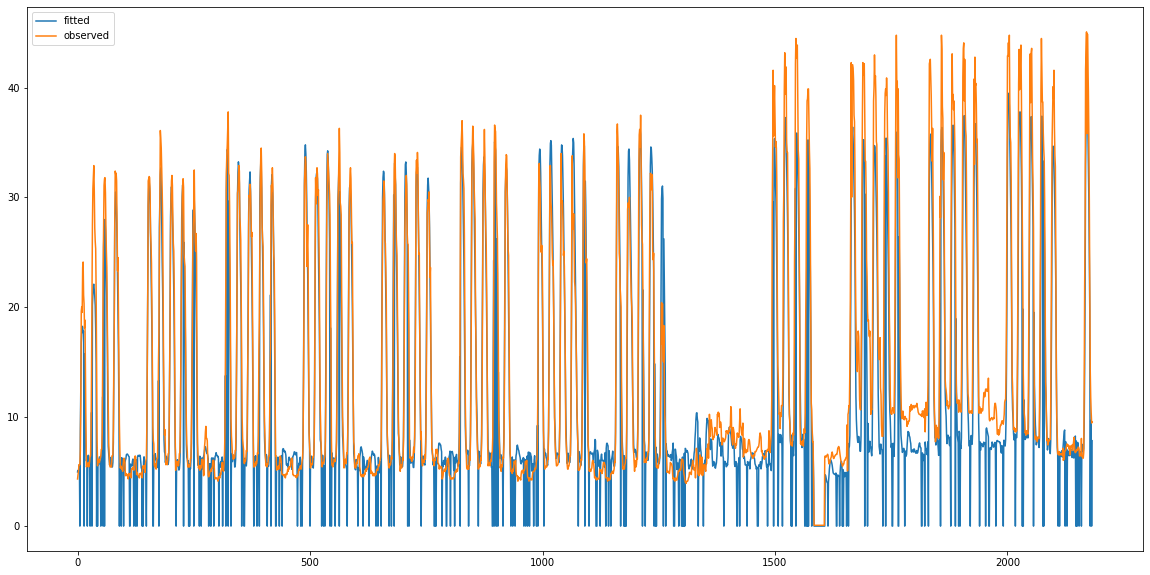

In [23]:
plt.figure(figsize=(20,10))
plt.plot(Y_fitted[0], label='fitted')
plt.plot(Y_train[0], label='observed')
plt.legend();